In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_wages_male = pd.read_excel("employment/Wages_male.xls")
df_wages_female = pd.read_excel("employment/Wages_female.xls")
df_vulnerable_male = pd.read_excel("employment/Vulnerable_male.xls")
df_vulnerable_female = pd.read_excel("employment/Vulnerable_female.xls")
df_unemployment_15_male = pd.read_excel("employment/Unemployment_15_24_male.xls")
df_unemployment_15_female = pd.read_excel("employment/Unemployment_15_24_female.xls")
df_total_unemployment_male = pd.read_excel("employment/Total_Unemployment_male.xls")
df_total_unemployment_female = pd.read_excel("employment/Total_Unemployment_female.xls")
df_laborforce_male = pd.read_excel("employment/labor_force_participation_rate_male.xls")
df_laborforce_female = pd.read_excel("employment/labor_force_participation_rate_female.xls")
df_services_male = pd.read_excel("employment/Employment_services_male.xls")
df_services_female = pd.read_excel("employment/Employment_services_female.xls")
df_agriculture_male = pd.read_excel("employment/Employment_agriculture_male.xls")
df_agriculture_female = pd.read_excel("employment/Employment_agriculture_female.xls")
df_industry_male = pd.read_excel("employment/Employment_indusrty_male.xls")
df_industry_female = pd.read_excel("employment/Employment_indusrty_female.xls")
df_contributing_male = pd.read_excel("employment/Contributing_family _workers_male.xls")
df_contributing_female = pd.read_excel("employment/Contributing_family _workers_female.xls")
df_economy_types = pd.read_excel("employment/economy_types.xlsx")
df_employment_female = pd.read_excel("employment/EmploymentToPopulationRatio_15+_female.xls")
df_employment_male = pd.read_excel("employment/EmploymentToPopulationRatio_15+_male.xls")

In [3]:
uniq, counts = np.unique(df_economy_types['IncomeGroup'], return_counts=True)
for i in range(0,4):
    print(uniq[i],"-",counts[i]) 

High income - 60
Low income - 29
Lower middle income - 48
Upper middle income - 50


In [4]:
uniq, counts = np.unique(df_economy_types['Region'], return_counts=True)
for i in range(0,7):
    print(uniq[i],"-",counts[i]) 

East Asia & Pacific - 29
Europe & Central Asia - 49
Latin America & Caribbean - 31
Middle East & North Africa - 21
North America - 2
South Asia - 8
Sub-Saharan Africa - 47


In [5]:
dict_female = {'Country Name' : df_economy_types['TableName']}
dict_male = {'Country Name' : df_economy_types['TableName']}
dict_GenderEmploymentIndex = {'Country Name' : df_economy_types['TableName'], 'IncomeGroup' : df_economy_types['IncomeGroup'], 'Region' : df_economy_types['Region'] }

j, k = 1, 0
for i in range(30):
    
    #Creating the string representation of the year
    if(i <=8):
        year_str = '199'+str(j)
        j +=1
    elif (i >= 9 and i <= 18) :
        year_str = '200'+str(k)
        k +=1
    else:
        year_str = '20'+str(k)
        k +=1
    
    factor_wage = (df_wages_female[year_str]*df_employment_female[year_str])/(df_wages_male[year_str]*df_employment_male[year_str])
    factor_laborforce = df_laborforce_female[year_str]/df_laborforce_male[year_str]
    factor_services = (df_services_female[year_str]*df_employment_female[year_str])/(df_services_male[year_str]*df_employment_male[year_str])
    factor_agriculture = (df_agriculture_female[year_str]*df_employment_female[year_str])/(df_agriculture_male[year_str]*df_employment_male[year_str])
    factor_industry = (df_industry_female[year_str]*df_employment_female[year_str])/(df_industry_male[year_str]*df_employment_male[year_str])
    factor_employment = df_employment_female[year_str]/df_employment_male[year_str]
    
    ratio =   factor_industry   +\
            factor_services   + factor_agriculture
    
    dict_GenderEmploymentIndex[year_str] = ratio/3


#Creating the male, female and GEI dataframe 
df_female = pd.DataFrame(dict_female)
df_male = pd.DataFrame(dict_male)
df_GenderEmploymentIndex = pd.DataFrame(dict_GenderEmploymentIndex)
print(df_GenderEmploymentIndex.head(5))
df_GenderEmploymentIndex.to_csv (r'comboclustered_data.csv', index = None, header=True) 

           Country Name          IncomeGroup                      Region  \
0           Afghanistan           Low income                  South Asia   
1                Angola  Lower middle income          Sub-Saharan Africa   
2               Albania  Upper middle income       Europe & Central Asia   
3  United Arab Emirates          High income  Middle East & North Africa   
4             Argentina  Upper middle income   Latin America & Caribbean   

       1991      1992      1993      1994      1995      1996      1997  ...  \
0  0.175509  0.175674  0.175586  0.174958  0.173189  0.171336  0.168538  ...   
1  0.838068  0.834380  0.828815  0.827345  0.831461  0.835798  0.839902  ...   
2  0.664991  0.664567  0.653707  0.649168  0.641363  0.633962  0.640241  ...   
3  0.208662  0.213521  0.219037  0.219931  0.220510  0.224616  0.228836  ...   
4  0.432832  0.524447  0.468807  0.446651  0.438933  0.395072  0.402235  ...   

       2011      2012      2013      2014      2015      2016 

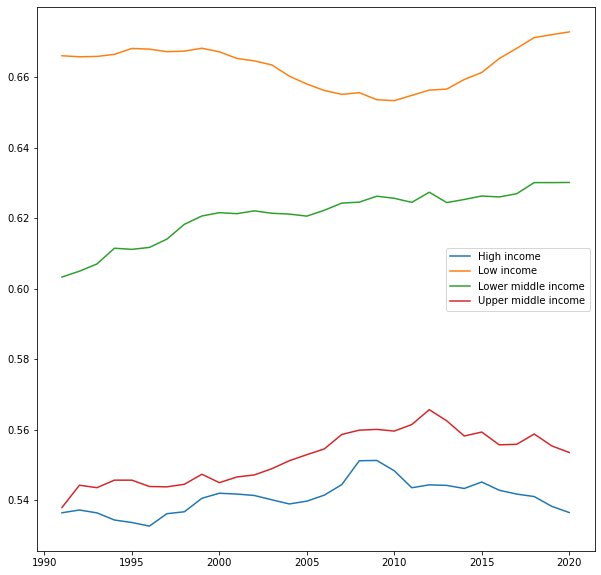

In [10]:
highincome= np.zeros(30)
lowincome= np.zeros(30)
lowmiddleincoem= np.zeros(30)
uppermiddleincome= np.zeros(30)
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('High income')
year=1990
i=0
for j in range(0,30):
            year= year+1
            highincome[i]= df2[str(year)].sum()/df2.shape[0]
            i=i+1
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Low income')
year=1990
i=0
for j in range(0,30):
            year= year+1
            lowincome[i]= df2[str(year)].sum()/df2.shape[0]
            i=i+1
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Lower middle income')
year=1990
i=0
for j in range(0,30):
            year= year+1
            lowmiddleincoem[i]= df2[str(year)].sum()/df2.shape[0]
            i=i+1
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Upper middle income')
year=1990
i=0
for j in range(0,30):
            year= year+1
            uppermiddleincome[i]= df2[str(year)].sum()/df2.shape[0]
            i=i+1            
dff = pd.DataFrame({
   'High income': highincome,
   'Low income': lowincome,
   'Lower middle income' : lowmiddleincoem,
   'Upper middle income' : uppermiddleincome
   }, index=[1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020])
fig= dff.plot(figsize=(10,10)).get_figure();
#lines = dff.plot.line()
fig.savefig('income_groups_plot.png')

In [11]:
df_GenderEmploymentIndex['5yearaverage'] = df_GenderEmploymentIndex[['2016','2017','2018','2019','2020']].mean(axis=1)
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Low income')
dflowmax= (df2.nlargest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('High income')
dfhighmax= (df2.nlargest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Lower middle income')
dflowmiddlemax= (df2.nlargest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Upper middle income')
dfhighmiddlemax= (df2.nlargest(5,['5yearaverage'])[['Country Name','5yearaverage']])

In [12]:
df_GenderEmploymentIndex['5yearaverage'] = df_GenderEmploymentIndex[['2016','2017','2018','2019','2020']].mean(axis=1)
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Low income')
dflowmin= (df2.nsmallest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('High income')
dfhighmin= (df2.nsmallest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Lower middle income')
dflowmiddlemin= (df2.nsmallest(5,['5yearaverage'])[['Country Name','5yearaverage']])
gk = df_GenderEmploymentIndex.groupby('IncomeGroup')
df2= gk.get_group('Upper middle income')
dfhighmiddlemin= (df2.nsmallest(5,['5yearaverage'])[['Country Name','5yearaverage']])

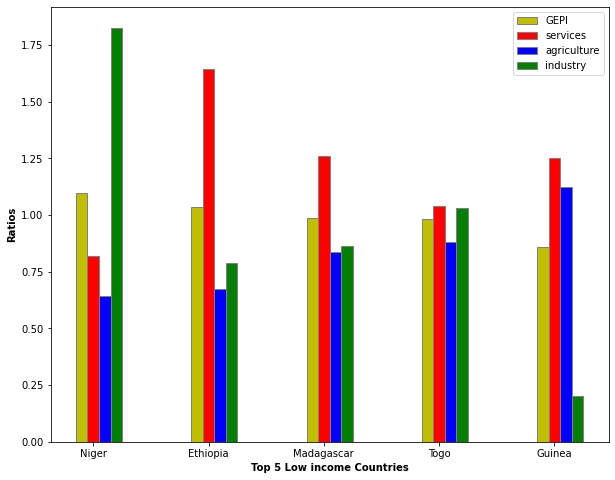

In [23]:
#df_wages_female= df_wages_female.rename(columns = {'Country Name':'Country'})
df_services_female= df_services_female.rename(columns = {'Country Name':'Country'})
df_agriculture_female= df_agriculture_female.rename(columns = {'Country Name':'Country'}) 
df_industry_female= df_industry_female.rename(columns = {'Country Name':'Country'})
#df_laborforce_female= df_laborforce_female.rename(columns = {'Country Name':'Country'})
#df_employment_female= df_employment_female.rename(columns = {'Country Name':'Country'})
#df_wages_male= df_wages_male.rename(columns = {'Country Name':'Country'})
df_services_male= df_services_male.rename(columns = {'Country Name':'Country'})
df_agriculture_male= df_agriculture_male.rename(columns = {'Country Name':'Country'}) 
df_industry_male= df_industry_male.rename(columns = {'Country Name':'Country'})
#df_laborforce_male= df_laborforce_male.rename(columns = {'Country Name':'Country'})
#df_employment_male= df_employment_male.rename(columns = {'Country Name':'Country'})
#wage= np.zeros(5)
services= np.zeros(5)
agriculture= np.zeros(5)
industry= np.zeros(5)
#laborforce= np.zeros(5)
#employment= np.zeros(5)
for i in range(0,5):
    #dfc= df_wages_female.loc[(df_wages_female.Country == dflowmax.iloc[i]['Country Name'] )]
    #dfc2= df_wages_male.loc[(df_wages_male.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc3= df_employment_female.loc[(df_employment_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc4= df_employment_male.loc[(df_employment_male.Country == dflowmax.iloc[i]['Country Name'] )]
    #wage[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    dfc= df_services_female.loc[(df_services_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc2= df_services_male.loc[(df_services_male.Country == dflowmax.iloc[i]['Country Name'] )]
    services[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    dfc= df_agriculture_female.loc[(df_agriculture_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc2= df_agriculture_male.loc[(df_agriculture_male.Country == dflowmax.iloc[i]['Country Name'] )]
    agriculture[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    dfc= df_industry_female.loc[(df_industry_female.Country == dflowmax.iloc[i]['Country Name'] )]
    dfc2= df_industry_male.loc[(df_industry_male.Country == dflowmax.iloc[i]['Country Name'] )]
    industry[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    #dfc= df_laborforce_female.loc[(df_laborforce_female.Country == dflowmax.iloc[i]['Country Name'] )]
    #dfc2= df_laborforce_male.loc[(df_laborforce_male.Country == dflowmax.iloc[i]['Country Name'] )]
    #laborforce[i]= ((dfc['2016']/dfc2['2016']) +(dfc['2017']/dfc2['2017'])+ (dfc['2018']/dfc2['2018']) + (dfc['2019']/dfc2['2019']) +(dfc['2020']/dfc2['2020'])) /5
    #dfc= df_employment_female.loc[(df_employment_female.Country == dflowmax.iloc[i]['Country Name'] )]
    #dfc2= df_employment_male.loc[(df_employment_male.Country == dflowmax.iloc[i]['Country Name'] )]
    #employment[i]= ((dfc['2016']/dfc2['2016']) +(dfc['2017']/dfc2['2017'])+ (dfc['2018']/dfc2['2018']) + (dfc['2019']/dfc2['2019']) +(dfc['2020']/dfc2['2020'])) /5
#dflowmax['wages'] = wage 
dflowmax['services'] = services
dflowmax['agriculture'] = agriculture
dflowmax['industry'] = industry
#dflowmax['laborforce'] = laborforce
#dflowmax['employment'] = employment
#print(dflowmax)    
import matplotlib.pyplot as plt


barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))
br1 = np.arange(len(dflowmax)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3]    
# Make the plot 
plt.bar(br1, dflowmax['5yearaverage'], color ='y', width = barWidth, 
        edgecolor ='grey', label ='GEPI') 
plt.bar(br2, dflowmax['services'], color ='r', width = barWidth, 
        edgecolor ='grey', label ='servcies') 
plt.bar(br3, dflowmax['agriculture'], color ='b', width = barWidth, 
        edgecolor ='grey', label ='agriculture') 
plt.bar(br4, dflowmax['industry'], color ='g', width = barWidth, 
        edgecolor ='grey', label ='industry')
#plt.bar(br5, dflowmax['laborforce'], color ='m', width = barWidth, 
#        edgecolor ='grey', label ='laborforce') 
#plt.bar(br6, dflowmax['employment'], color ='y', width = barWidth, 
#        edgecolor ='grey', label ='employment') 
   
# Adding Xticks  
plt.xlabel('Top 5 Low income Countries', fontweight ='bold') 
plt.ylabel('Ratios', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(dflowmax))], 
           dflowmax['Country Name']) 
plt.legend(['GEPI','services','agriculture','industry'],loc=1)

   
plt.show() 



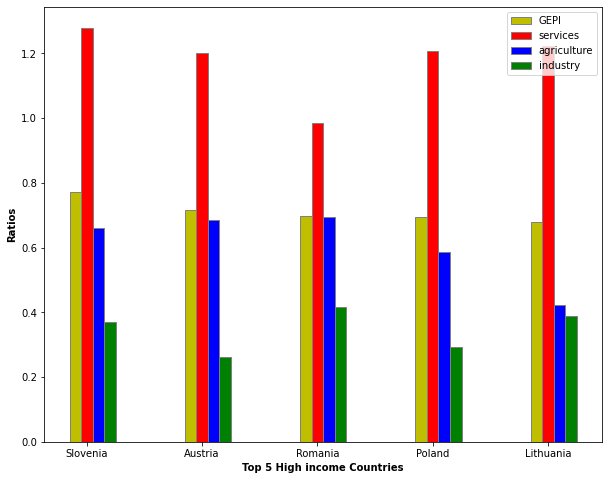

In [25]:
services= np.zeros(5)
agriculture= np.zeros(5)
industry= np.zeros(5)
for i in range(0,5):
    dfc3= df_employment_female.loc[(df_employment_female.Country == dfhighmax.iloc[i]['Country Name'] )]
    dfc4= df_employment_male.loc[(df_employment_male.Country == dfhighmax.iloc[i]['Country Name'] )]
    dfc= df_services_female.loc[(df_services_female.Country == dfhighmax.iloc[i]['Country Name'] )]
    dfc2= df_services_male.loc[(df_services_male.Country == dfhighmax.iloc[i]['Country Name'] )]
    services[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    dfc= df_agriculture_female.loc[(df_agriculture_female.Country == dfhighmax.iloc[i]['Country Name'] )]
    dfc2= df_agriculture_male.loc[(df_agriculture_male.Country == dfhighmax.iloc[i]['Country Name'] )]
    agriculture[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    dfc= df_industry_female.loc[(df_industry_female.Country == dfhighmax.iloc[i]['Country Name'] )]
    dfc2= df_industry_male.loc[(df_industry_male.Country == dfhighmax.iloc[i]['Country Name'] )]
    industry[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
dfhighmax['services'] = services
dfhighmax['agriculture'] = agriculture
dfhighmax['industry'] = industry
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))
br1 = np.arange(len(dflowmax)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3]    
# Make the plot 
plt.bar(br1, dfhighmax['5yearaverage'], color ='y', width = barWidth, 
        edgecolor ='grey', label ='GEPI') 
plt.bar(br2, dfhighmax['services'], color ='r', width = barWidth, 
        edgecolor ='grey', label ='servcies') 
plt.bar(br3, dfhighmax['agriculture'], color ='b', width = barWidth, 
        edgecolor ='grey', label ='agriculture') 
plt.bar(br4, dfhighmax['industry'], color ='g', width = barWidth, 
        edgecolor ='grey', label ='industry')
   
# Adding Xticks  
plt.xlabel('Top 5 High income Countries', fontweight ='bold') 
plt.ylabel('Ratios', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(dflowmax))], 
           dfhighmax['Country Name']) 
plt.legend(['GEPI','services','agriculture','industry'],loc=1)
plt.show() 



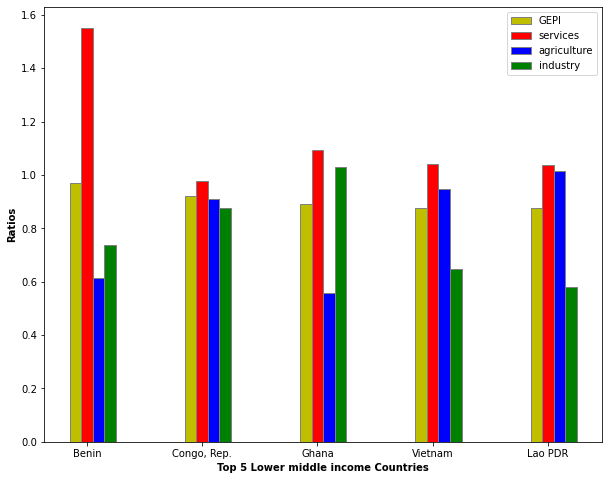

In [28]:
services= np.zeros(5)
agriculture= np.zeros(5)
industry= np.zeros(5)
for i in range(0,5):
    dfc3= df_employment_female.loc[(df_employment_female.Country == dflowmiddlemax.iloc[i]['Country Name'] )]
    dfc4= df_employment_male.loc[(df_employment_male.Country == dflowmiddlemax.iloc[i]['Country Name'] )]
    dfc= df_services_female.loc[(df_services_female.Country == dflowmiddlemax.iloc[i]['Country Name'] )]
    dfc2= df_services_male.loc[(df_services_male.Country == dflowmiddlemax.iloc[i]['Country Name'] )]
    services[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    dfc= df_agriculture_female.loc[(df_agriculture_female.Country == dflowmiddlemax.iloc[i]['Country Name'] )]
    dfc2= df_agriculture_male.loc[(df_agriculture_male.Country == dflowmiddlemax.iloc[i]['Country Name'] )]
    agriculture[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    dfc= df_industry_female.loc[(df_industry_female.Country == dflowmiddlemax.iloc[i]['Country Name'] )]
    dfc2= df_industry_male.loc[(df_industry_male.Country == dflowmiddlemax.iloc[i]['Country Name'] )]
    industry[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
dflowmiddlemax['services'] = services
dflowmiddlemax['agriculture'] = agriculture
dflowmiddlemax['industry'] = industry
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))
br1 = np.arange(len(dflowmax)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3]    
# Make the plot 
plt.bar(br1, dflowmiddlemax['5yearaverage'], color ='y', width = barWidth, 
        edgecolor ='grey', label ='GEPI') 
plt.bar(br2, dflowmiddlemax['services'], color ='r', width = barWidth, 
        edgecolor ='grey', label ='servcies') 
plt.bar(br3, dflowmiddlemax['agriculture'], color ='b', width = barWidth, 
        edgecolor ='grey', label ='agriculture') 
plt.bar(br4, dflowmiddlemax['industry'], color ='g', width = barWidth, 
        edgecolor ='grey', label ='industry')
   
# Adding Xticks  
plt.xlabel('Top 5 Lower middle income Countries', fontweight ='bold') 
plt.ylabel('Ratios', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(dflowmiddlemax))], 
           dflowmiddlemax['Country Name']) 
plt.legend(['GEPI','services','agriculture','industry'],loc=1)
plt.show() 



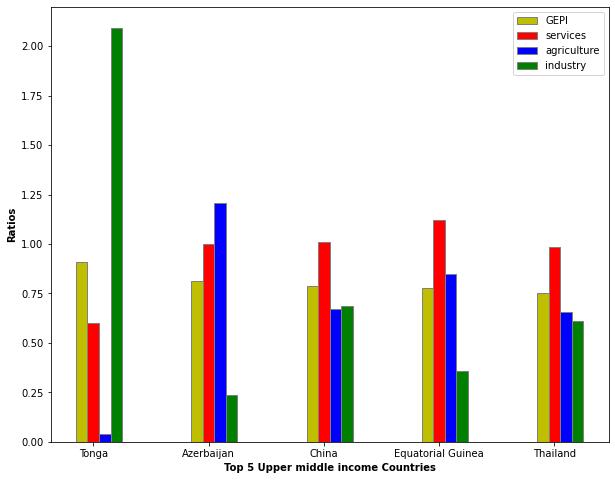

In [29]:
services= np.zeros(5)
agriculture= np.zeros(5)
industry= np.zeros(5)
for i in range(0,5):
    dfc3= df_employment_female.loc[(df_employment_female.Country == dfhighmiddlemax.iloc[i]['Country Name'] )]
    dfc4= df_employment_male.loc[(df_employment_male.Country == dfhighmiddlemax.iloc[i]['Country Name'] )]
    dfc= df_services_female.loc[(df_services_female.Country == dfhighmiddlemax.iloc[i]['Country Name'] )]
    dfc2= df_services_male.loc[(df_services_male.Country == dfhighmiddlemax.iloc[i]['Country Name'] )]
    services[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    dfc= df_agriculture_female.loc[(df_agriculture_female.Country == dfhighmiddlemax.iloc[i]['Country Name'] )]
    dfc2= df_agriculture_male.loc[(df_agriculture_male.Country == dfhighmiddlemax.iloc[i]['Country Name'] )]
    agriculture[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
    dfc= df_industry_female.loc[(df_industry_female.Country == dfhighmiddlemax.iloc[i]['Country Name'] )]
    dfc2= df_industry_male.loc[(df_industry_male.Country == dfhighmiddlemax.iloc[i]['Country Name'] )]
    industry[i]= (((dfc['2016']*dfc3['2016'])/(dfc2['2016']*dfc4['2016']))+ ((dfc['2017']*dfc3['2017'])/(dfc2['2017']*dfc4['2017']))+ ((dfc['2018']*dfc3['2018'])/(dfc2['2018']*dfc4['2018'])) + ((dfc['2019']*dfc3['2019'])/(dfc2['2019']*dfc4['2019'])) +((dfc['2020']*dfc3['2020'])/(dfc2['2020']*dfc4['2020']))) /5
dfhighmiddlemax['services'] = services
dfhighmiddlemax['agriculture'] = agriculture
dfhighmiddlemax['industry'] = industry
barWidth = 0.1
fig = plt.subplots(figsize =(10, 8))
br1 = np.arange(len(dflowmax)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3]    
# Make the plot 
plt.bar(br1, dfhighmiddlemax['5yearaverage'], color ='y', width = barWidth, 
        edgecolor ='grey', label ='GEPI') 
plt.bar(br2, dfhighmiddlemax['services'], color ='r', width = barWidth, 
        edgecolor ='grey', label ='servcies') 
plt.bar(br3, dfhighmiddlemax['agriculture'], color ='b', width = barWidth, 
        edgecolor ='grey', label ='agriculture') 
plt.bar(br4, dfhighmiddlemax['industry'], color ='g', width = barWidth, 
        edgecolor ='grey', label ='industry')
   
# Adding Xticks  
plt.xlabel('Top 5 Upper middle income Countries', fontweight ='bold') 
plt.ylabel('Ratios', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(dfhighmiddlemax))], 
           dfhighmiddlemax['Country Name']) 
plt.legend(['GEPI','services','agriculture','industry'],loc=1)
plt.show() 

